               ProductName  Reveneau
0            Côte de Blaye  62976.50
1  Thüringer Rostbratwurst  20796.72
2     Raclette Courdavault  19030.00
3           Tarte au sucre  16022.50
4        Camembert Pierrot  14620.00


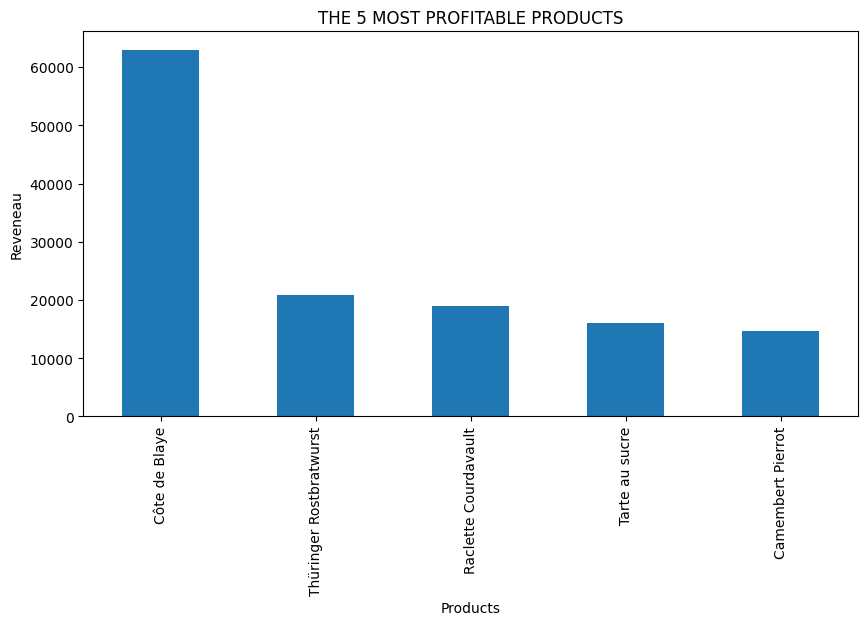

                 ProductName  Reveneau
0  Laughing Lumberjack Lager      70.0
1                Røgede sild     142.5
2                   Filo Mix     336.0


C:\Users\HP ELITEDESK\AppData\Local\Temp\ipykernel_15316\3298614564.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ProductName", y="Reveneau", data=top_products_df ,palette= my_palette )


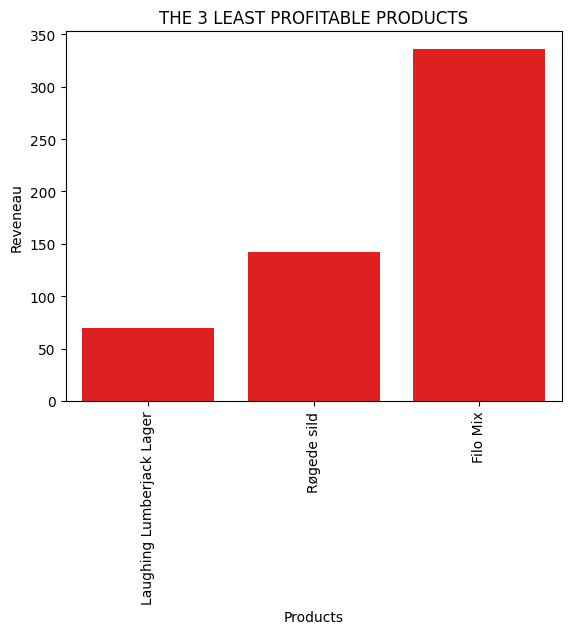

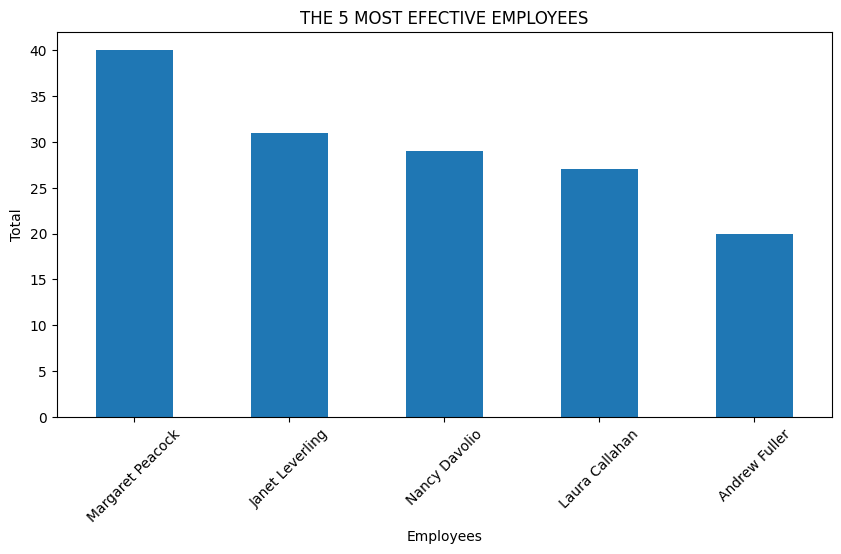

C:\Users\HP ELITEDESK\AppData\Local\Temp\ipykernel_15316\3298614564.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Employee", y="Total", data=top_employees ,palette= my_palette2 )


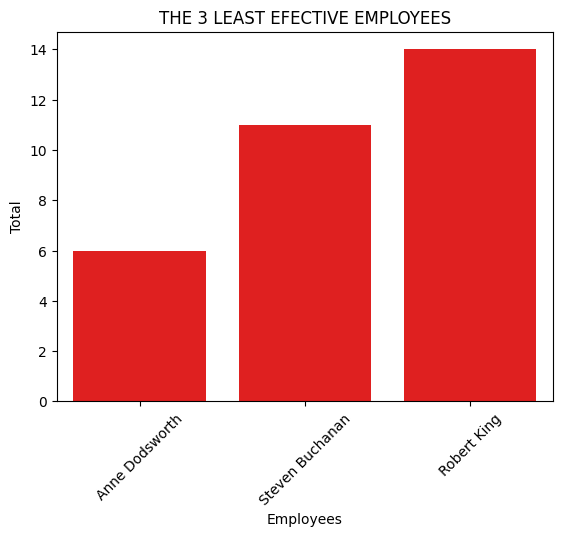

In [1]:
import pandas as pd
import sqlite3 as sq
import matplotlib.pyplot as plt
import seaborn as sns

with sq.connect("Northwind.db") as conn :
    
    query1 = ('''
       SELECT ProductName,SUM(Price * Quantity) as Reveneau
       From OrderDetails OD
       JOIN Products p ON p.ProductID = OD.ProductID
       GROUP BY OD.ProductID
       ORDER BY Reveneau DESC
       LIMIT 5
 ''')
    
    top_products_df = pd.read_sql_query(query1,conn)
    
    print(top_products_df)

    top_products_df.plot(x = "ProductName", y = "Reveneau" ,kind = "bar",figsize = (10,5),legend = False)

    plt.title("THE 5 MOST PROFITABLE PRODUCTS")
    plt.xlabel("Products")
    plt.ylabel("Reveneau")
    plt.xticks(rotation = 90)
    plt.show()

    
    query1_1 = ('''
      SELECT ProductName,SUM(Price * Quantity) as Reveneau
      From OrderDetails OD
      JOIN Products p ON p.ProductID = OD.ProductID
      GROUP BY OD.ProductID
      ORDER BY Reveneau ASC
      LIMIT 3
''')
    
    cursor = conn.cursor()
    top_products_df = pd.read_sql_query(query1_1,conn)
    
    print(top_products_df)
    my_palette = ["#FF0000","#FF0000", "#FF0000"]
    sns.barplot(x="ProductName", y="Reveneau", data=top_products_df ,palette= my_palette )

    plt.title("THE 3 LEAST PROFITABLE PRODUCTS")
    plt.xlabel("Products")
    plt.ylabel("Reveneau")
    plt.xticks(rotation = 90)
    plt.show()

    query2 = '''
    SELECT FirstName || " " || LastName as Employee, COUNT(*) as Total
     From Orders O
     JOIN Employees E
     ON E.EmployeeID = O.EmployeeID
     GROUP BY O.EmployeeID
     ORDER BY Total DESC
     LIMIT 5
'''

    top_employees = pd.read_sql_query(query2,conn)
    top_employees.plot(x = "Employee" , y= "Total" , kind = "bar" ,figsize = (10,5),legend = False)

    plt.title("THE 5 MOST EFECTIVE EMPLOYEES")
    plt.xlabel("Employees")
    plt.ylabel("Total")
    plt.xticks(rotation = 45)
    plt.show()
    
    query2_2 = '''
    SELECT FirstName || " " || LastName as Employee, COUNT(*) as Total
     From Orders O
     JOIN Employees E
     ON E.EmployeeID = O.EmployeeID
     GROUP BY O.EmployeeID
     ORDER BY Total ASC
     LIMIT 3
'''

    top_employees = pd.read_sql_query(query2_2,conn)
    my_palette2 = ["#FF0000","#FF0000", "#FF0000"]
    sns.barplot(x="Employee", y="Total", data=top_employees ,palette= my_palette2 )

    plt.title("THE 3 LEAST EFECTIVE EMPLOYEES")
    plt.xlabel("Employees")
    plt.ylabel("Total")
    plt.xticks(rotation = 45)
    plt.show()